## Preprocesamiento de Datos
A continuación se analizarán y preprocesarán los datos para dejar un dataset limpio y preparado para la construcción de modelos más adelante.

#### **Importación de Librerías**

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# Ubicación de los datos preprocesados
data_path = '../data/processed/'

#### **Importar los datasets**

In [42]:
df_30 = pd.read_csv('../data/raw/features_30_sec.csv')
df_3 = pd.read_csv('../data/raw/features_3_sec.csv')
print("Dataset de canciones de 30 segundos:")
print(df_30.shape)
df_30.head()

Dataset de canciones de 30 segundos:
(1000, 60)


,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,129774.064525,2002.449060,85882.761315,3805.839606,9.015054e+05,0.083045,0.000767,-4.529724e-05,0.008172,0.000008,0.005698,123.046875,-113.570648,2564.207520,121.571793,295.913818,-19.168142,235.574432,42.366421,151.106873,-6.364664,167.934799,18.623499,89.180840,-13.704891,67.660492,15.343150,68.932579,-12.274110,82.204201,10.976572,63.386311,-8.326573,61.773094,8.803792,51.244125,-3.672300,41.217415,5.747995,40.554478,-5.162882,49.775421,0.752740,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,375850.073649,2039.036516,213843.755497,3550.522098,2.977893e+06,0.056040,0.001448,1.395807e-04,0.005099,-0.000178,0.003063,67.999589,-207.501694,7764.555176,123.991264,560.259949,8.955127,572.810913,35.877647,264.506104,2.907320,279.932922,21.510466,156.477097,-8.560436,200.849182,23.370686,142.555954,-10.099661,166.108521,11.900497,104.358612,-5.555639,105.173630,5.376327,96.197212,-2.231760,64.914291,4.220140,73.152534,-6.012148,52.422142,0.927998,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,156467.643368,1747.702312,76254.192257,3042.260232,7.840345e+05,0.076291,0.001007,2.105576e-06,0.016342,-0.000019,0.007458,161.499023,-90.722595,3319.044922,140.446304,508.765045,-29.093889,411.781219,31.684334,144.090317,-13.984504,155.493759,25.764742,74.548401,-13.664875,106.981827,11.639934,106.574875,-11.783643,65.447945,9.718760,67.908859,-13.133803,57.781425,5.791199,64.480209,-8.907628,60.385151,-1.077000,57.711136,-9.229274,36.580986,2.451690,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,184355.942417,1596.412872,166441.494769,2184.745799,1.493194e+06,0.033309,0.000423,4.583644e-07,0.019054,-0.000014,0.002712,63.024009,-199.544205,5507.517090,150.090897,456.505402,5.662678,257.161163,26.859079,158.267303,1.771399,268.034393,14.234031,126.794128,-4.832006,155.912079,9.286494,81.273743,-0.759186,92.114090,8.137607,71.314079,-3.200653,110.236687,6.079319,48.251999,-2.480174,56.799400,-1.079305,62.289902,-2.870789,51.651592,0.780874,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,343399.939274,1748.172116,88445.209036,3579.757627,1.572978e+06,0.101461,0.001954,-1.756129e-05,0.004814,-0.000010,0.003094,135.999178,-160.337708,5195.291992,126.219635,853.784729,-35.587811,333.792938,22.148071,193.456100,-32.478600,336.276825,10.852294,134.831573,-23.352329,93.257095,0.498434,124.672127,-11.793437,130.073349,1.207256,99.675575,-13.088418,80.254066,-2.813867,86.430626,-6.933385,89.555443,-7.552725,70.943336,-9.164666,75.793404,-4.520576,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues


In [43]:
print("Dataset de canciones de 3 segundos:")
print(df_3.shape)
df_3.head()

Dataset de canciones de 3 segundos:
(9990, 60)


,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,1.080790e+06,0.081851,0.000558,-0.000078,0.008354,-0.000068,0.005535,129.199219,-118.627914,2440.286621,125.083626,260.956909,-23.443724,364.081726,41.321484,181.694855,-5.976108,152.963135,20.115141,75.652298,-16.045410,40.227104,17.855198,84.320282,-14.633434,83.437233,10.270527,97.001335,-9.708279,66.669891,10.183875,45.103611,-4.681614,34.169498,8.417439,48.269444,-7.233477,42.770947,-2.853603,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,6.722448e+05,0.087173,0.001030,-0.000099,0.004950,-0.000103,0.004854,123.046875,-125.590706,2038.344238,122.421227,216.774185,-20.718019,231.979767,50.128387,142.700409,-11.333302,139.243118,21.385401,77.817947,-15.960796,97.364029,19.454103,57.948093,-12.465918,68.271523,17.898169,56.222176,-11.732554,54.373909,8.145000,40.662876,-7.717751,30.808521,8.397150,48.784225,-8.300493,68.584824,4.074709,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,7.907127e+05,0.071383,0.000425,-0.000066,0.012476,0.000065,0.004357,123.046875,-132.441940,3798.532227,115.085175,257.321289,-14.811666,192.448074,50.189293,144.166031,-0.680819,128.376892,24.650375,66.371170,-13.506104,89.319336,15.643386,55.253967,-13.216637,120.308784,10.406025,35.757862,-7.991465,47.911613,11.853963,36.569931,-4.677677,40.725075,6.571110,30.686846,-2.424750,50.313499,4.806280,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,9.216524e+05,0.069426,0.000304,-0.000014,0.008318,0.000018,0.005927,123.046875,-118.231087,2508.781006,132.116501,332.650574,-18.758335,109.357529,39.769306,184.693344,-13.260426,144.398224,20.468134,122.516464,-14.563448,68.937332,18.745104,74.748886,-13.755463,73.868576,12.993759,41.549564,-12.648887,58.540478,10.389314,39.102024,-4.362739,60.714748,9.156193,40.411537,-9.889441,44.666325,-1.359111,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,6.102111e+05,0.070095,0.000289,0.000041,0.009634,-0.000106,0.005833,123.046875,-105.968376,2118.919922,134.643646,219.562622,-19.961748,171.878754,40.171753,103.120712,-14.271939,102.651230,18.734617,79.070000,-15.619381,48.510284,19.207966,53.642956,-18.274683,95.300995,14.316693,58.821163,-5.792194,55.030254,17.045437,43.229939,-5.681399,46.515259,5.705521,24.956211,-7.986080,39.816933,2.092937,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [44]:
# Verificar nulos
print("Nulos en el dataset de 30 segundos:")
print(df_30.isnull().sum())
print("Nulos en el dataset de 3 segundos:")
print(df_3.isnull().sum())

# Tipos de datos
print("Tipo de datos en el dataset de 30 segundos:")
print(df_30.dtypes)
print("Tipo de datos en el dataset de 3 segundos:")
print(df_3.dtypes)

# Revisar clases únicas
print("Clases únicas en el dataset de 30 segundos:")
print(df_30['label'].value_counts())
print("Clases únicas en el dataset de 3 segundos:")
print(df_3['label'].value_counts())

Nulos en el dataset de 30 segundos:
filename                   0
length                     0
chroma_stft_mean           0
chroma_stft_var            0
rms_mean                   0
rms_var                    0
spectral_centroid_mean     0
spectral_centroid_var      0
spectral_bandwidth_mean    0
spectral_bandwidth_var     0
rolloff_mean               0
rolloff_var                0
zero_crossing_rate_mean    0
zero_crossing_rate_var     0
harmony_mean               0
harmony_var                0
perceptr_mean              0
perceptr_var               0
tempo                      0
mfcc1_mean                 0
mfcc1_var                  0
mfcc2_mean                 0
mfcc2_var                  0
mfcc3_mean                 0
mfcc3_var                  0
mfcc4_mean                 0
mfcc4_var                  0
mfcc5_mean                 0
mfcc5_var                  0
mfcc6_mean                 0
mfcc6_var                  0
mfcc7_mean                 0
mfcc7_var                  0
mfcc8_m

#### **Distribución y Correlaciones**

**30 segundos**

                         length  chroma_stft_mean  chroma_stft_var  rms_mean  \
length                     1.00              0.02             0.07      0.10   
chroma_stft_mean           0.02              1.00            -0.46      0.50   
chroma_stft_var            0.07             -0.46             1.00     -0.08   
rms_mean                   0.10              0.50            -0.08      1.00   
rms_var                    0.12              0.26             0.29      0.61   
spectral_centroid_mean     0.05              0.62            -0.25      0.51   
spectral_centroid_var      0.12              0.29             0.31      0.32   
spectral_bandwidth_mean    0.06              0.52            -0.04      0.53   
spectral_bandwidth_var     0.12              0.04             0.35      0.10   
rolloff_mean               0.04              0.60            -0.17      0.54   
rolloff_var                0.11              0.12             0.38      0.20   
zero_crossing_rate_mean    0.03         

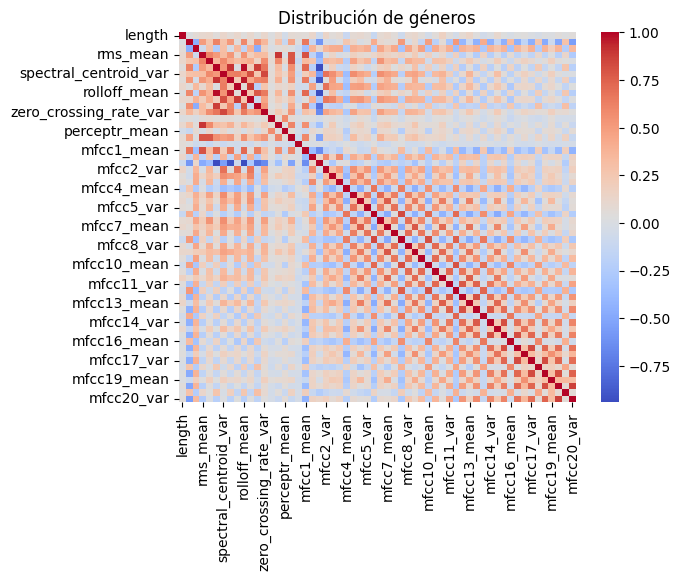

In [45]:
# Distribución de clases
sns.countplot(data=df_30, x='label')
plt.xticks(rotation=45)
plt.title("Distribución de géneros")

# Correlaciones
corr = df_30.drop(['filename', 'label'], axis=1).corr()
sns.heatmap(corr, cmap='coolwarm')

# Mostrar la matriz de correlación redondeada a 2 decimales
pd.set_option('display.max_rows', None)  # Opcional: muestra todas las filas
pd.set_option('display.max_columns', None)  # Opcional: muestra todas las columnas

print(corr.round(2))

**3 segundos**

<Axes: title={'center': 'Distribución de géneros'}>

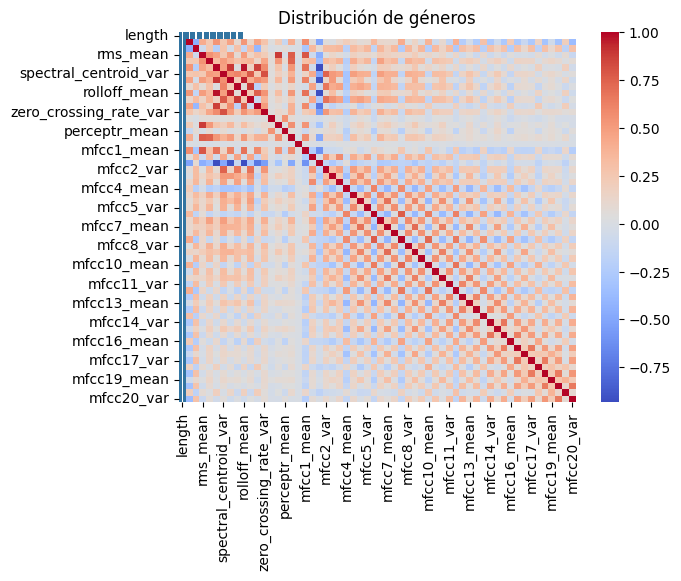

In [46]:

# Distribución de clases
sns.countplot(data=df_3, x='label')
plt.xticks(rotation=45)
plt.title("Distribución de géneros")

# Correlaciones
corr = df_3.drop(['filename', 'label'], axis=1).corr()
sns.heatmap(corr, cmap='coolwarm')


#### **Análisis:**
El dataset `features_30_sec.csv` contiene **1000** canciones, repartidas en grupos de 100 canciones del mismo género. Por otro lado el dataset `features_3_sec.csv` contiene **9990** canciones, repartidas en grupos de entre 997 a 1000 canciones del mismo género.



#### **Codificar los datos:**

In [56]:
le = LabelEncoder()
df_3['label_encoded'] = le.fit_transform(df_3['label'])

genre_mapping_3 = {int(idx): genre for genre, idx in zip(le.classes_, le.transform(le.classes_))}

In [57]:
le = LabelEncoder()
df_30['label_encoded'] = le.fit_transform(df_30['label'])

genre_mapping_30 = {int(idx): genre for genre, idx in zip(le.classes_, le.transform(le.classes_))}


In [58]:
import json

# Guardar los diccionarios demapeos de generos en mapping/
df_30_mapping_path = '../data/mapping/genre_mapping_30.json'
df_3_mapping_path = '../data/mapping/genre_mapping_3.json'

with open(df_30_mapping_path, 'w', encoding='utf-8') as f:
    json.dump(genre_mapping_30, f, ensure_ascii=False, indent=4)
with open(df_3_mapping_path, 'w', encoding='utf-8') as f:
    json.dump(genre_mapping_3, f, ensure_ascii=False, indent=4)

Escalar variables

In [50]:
# 30 segundos
features = df_30.drop(columns=['filename', 'label', 'label_encoded']).columns
scaler = StandardScaler()
df_30[features] = scaler.fit_transform(df_30[features])

# 3 segundos
features = df_3.drop(columns=['filename', 'label', 'label_encoded']).columns
scaler = StandardScaler()
df_3[features] = scaler.fit_transform(df_3[features])

Exportar dataframes escalados a CSV

In [51]:
df_final_30 = df_30.drop(columns=['filename', 'label', 'length'])
df_final_30.to_csv(data_path+'preprocessed_data_30.csv', index=False)
df_final_3 = df_3.drop(columns=['filename', 'label', 'length'])
df_final_3.to_csv(data_path+'preprocessed_data_3.csv', index=False)

### **Feature Extraction**

### Random Forest Classifier

In [52]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd

X = df_3.drop(columns=['filename', 'label'])
y = df_3['label_encoded']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar modelo
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Importancia de features
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances = importances.sort_values(ascending=False)
print(importances)


label_encoded              0.254939
perceptr_var               0.047562
chroma_stft_mean           0.030117
rms_var                    0.026202
rms_mean                   0.025791
spectral_bandwidth_mean    0.025182
mfcc4_mean                 0.023535
mfcc1_mean                 0.022569
rolloff_mean               0.021127
spectral_centroid_mean     0.020387
rolloff_var                0.020222
mfcc1_var                  0.019776
harmony_var                0.019526
perceptr_mean              0.018585
mfcc9_mean                 0.017483
mfcc6_mean                 0.017321
mfcc5_var                  0.016521
spectral_centroid_var      0.016482
zero_crossing_rate_mean    0.015635
mfcc8_mean                 0.015193
mfcc3_mean                 0.014247
chroma_stft_var            0.014003
mfcc6_var                  0.013379
mfcc11_mean                0.012951
mfcc3_var                  0.012484
harmony_mean               0.012052
mfcc12_mean                0.011824
mfcc7_mean                 0

### SelectKBest respecto a `label_encoded`

In [53]:
from sklearn.feature_selection import mutual_info_classif

mi = mutual_info_classif(X, y, random_state=42)
mi_scores = pd.Series(mi, index=X.columns).sort_values(ascending=False)
print(mi_scores)



label_encoded              2.303485
perceptr_var               0.508774
spectral_bandwidth_mean    0.423241
rms_var                    0.394941
rolloff_mean               0.384005
chroma_stft_mean           0.374951
mfcc1_mean                 0.366272
spectral_centroid_var      0.366271
spectral_centroid_mean     0.352372
rms_mean                   0.333084
mfcc2_mean                 0.314932
rolloff_var                0.310196
harmony_var                0.274568
zero_crossing_rate_var     0.262976
mfcc4_mean                 0.260290
mfcc4_var                  0.260250
mfcc5_var                  0.237849
mfcc6_var                  0.236228
mfcc6_mean                 0.234701
mfcc8_mean                 0.228292
zero_crossing_rate_mean    0.224791
mfcc9_mean                 0.223666
perceptr_mean              0.221392
spectral_bandwidth_var     0.220780
mfcc3_var                  0.216642
mfcc7_var                  0.209847
harmony_mean               0.208420
mfcc1_var                  0

En base a los resultados, las columnas que se consideran más importantes son las siguientes:

`perceptr_var`, `chroma_stft_mean`,`rms_mean`,`rms_var`, `spectral_bandwidth_mean`, `mfcc4_mean`, `mfcc1_mean`, `rolloff_mean`, `spectral_centroid_mean`, `mfcc9_mean`,`mfcc6_mean`, `mfcc8_mean`

In [54]:
top_features = [
    'perceptr_var',
    'chroma_stft_mean',
    'rms_mean',
    'rms_var',
    'spectral_bandwidth_mean',
    'mfcc4_mean',
    'mfcc1_mean',
    'rolloff_mean',
    'spectral_centroid_mean',
    'mfcc9_mean',
    'mfcc6_mean',
    'mfcc8_mean',
    'label_encoded'
]

df_3_extracted = df_3[top_features]
df_30_extracted = df_30[top_features]

Importar datos en archivo CSV

In [55]:
df_3_extracted.to_csv(data_path + 'extracted_data_3.csv', index=False)
df_30_extracted.to_csv(data_path + 'extracted_data_30.csv', index=False)